In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np
import seaborn as sns

from ipynb.fs.full.common import *


In [2]:
# load gameplays
gameplays = pd.json_normalize(pd.Series(open(r"C:\Users\Yasmine Bogaert\Documents\thesis\dump\dump_30-03-2021\csv\gameplays.json").readlines()).apply(json.loads))
gameplays = preprocess_gameplays(gameplays)
gameplays = add_distance_per_jump(gameplays)

In [3]:
# load questionresponses and expand the response columns to contain "lastentry" and "secondlastentry" instead of 'A', 'B' or 'BOTH'
questionresponses = pd.json_normalize(pd.Series(open(r"C:\Users\Yasmine Bogaert\Documents\thesis\dump\dump_30-03-2021\csv\questionresponses.json").readlines()).apply(json.loads))
questionresponses = expand_questionresponses(questionresponses)

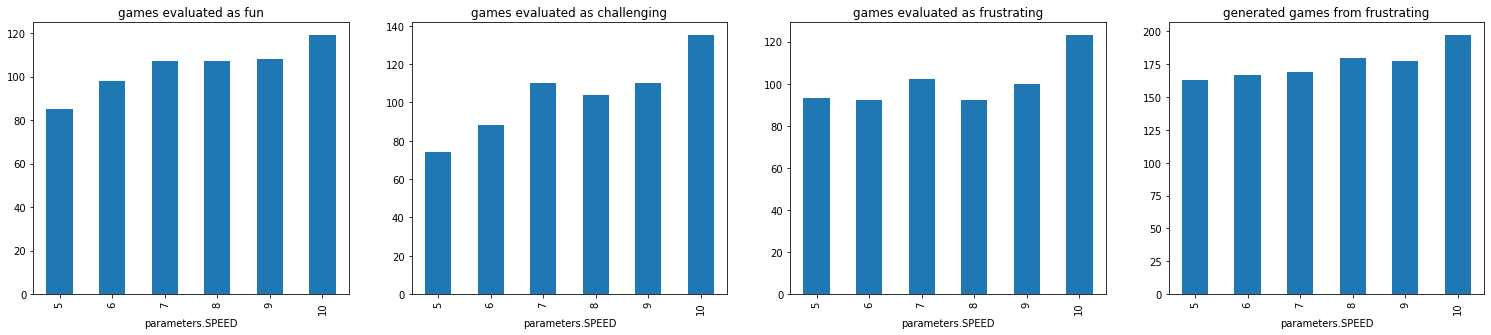

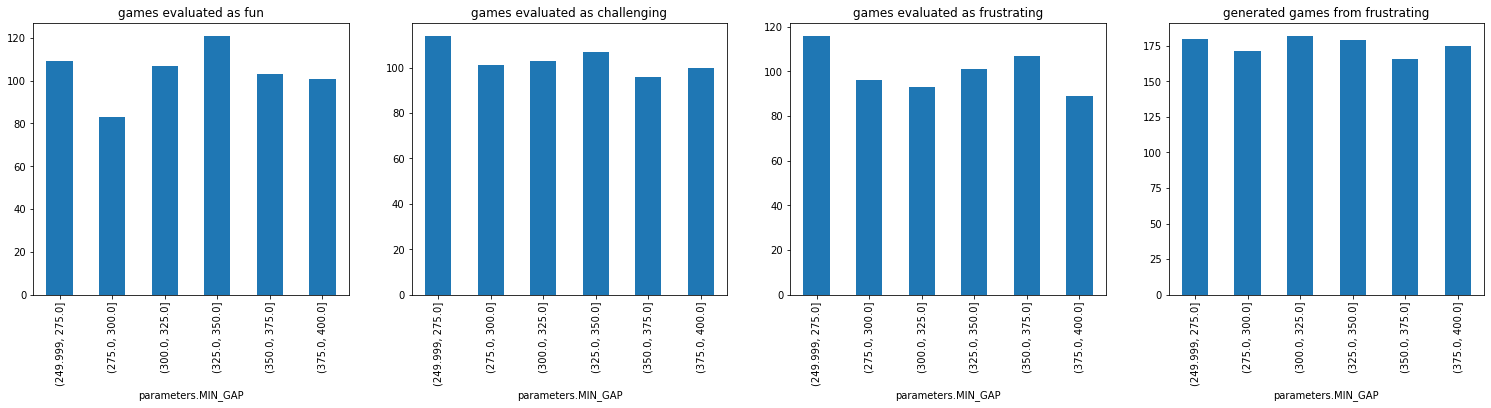

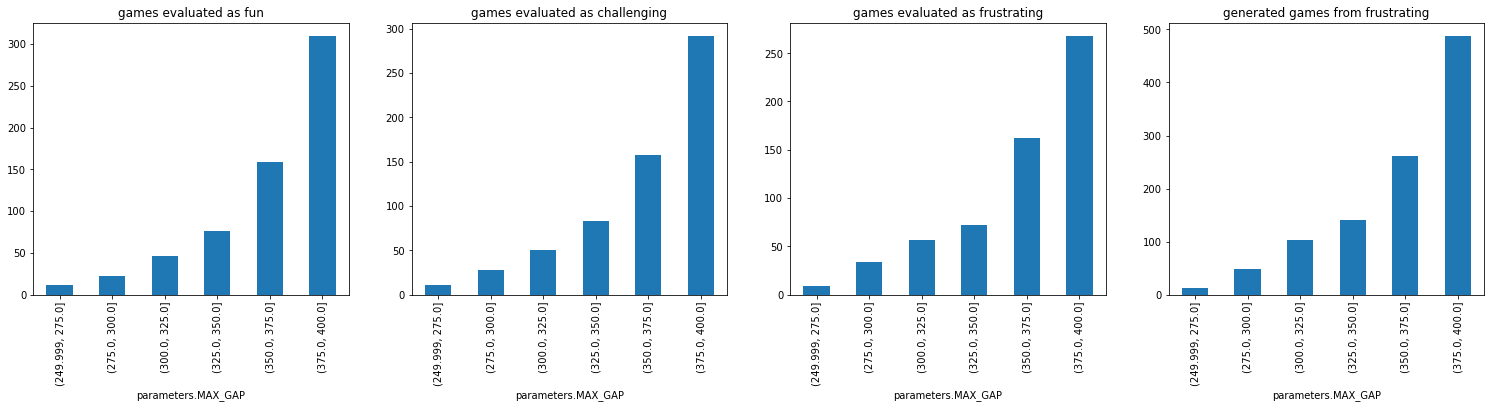

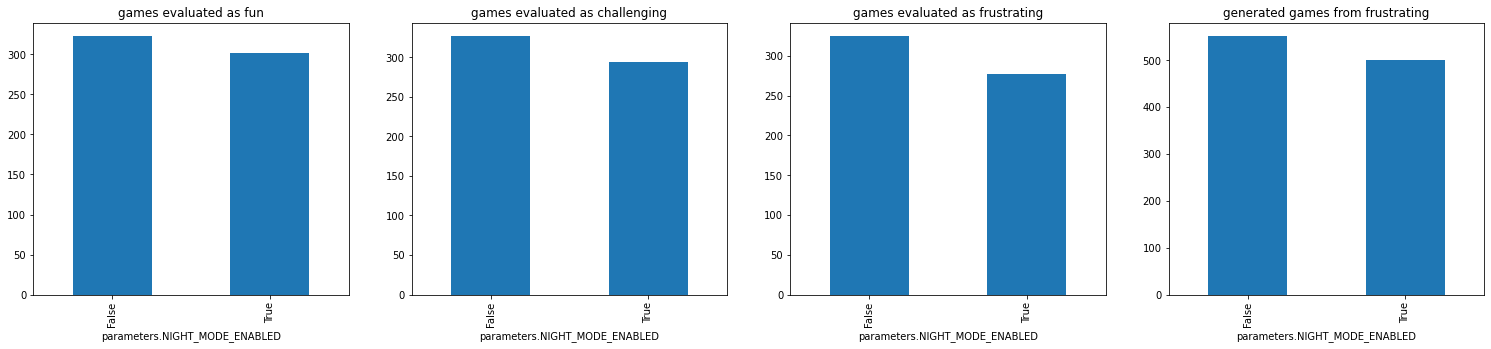

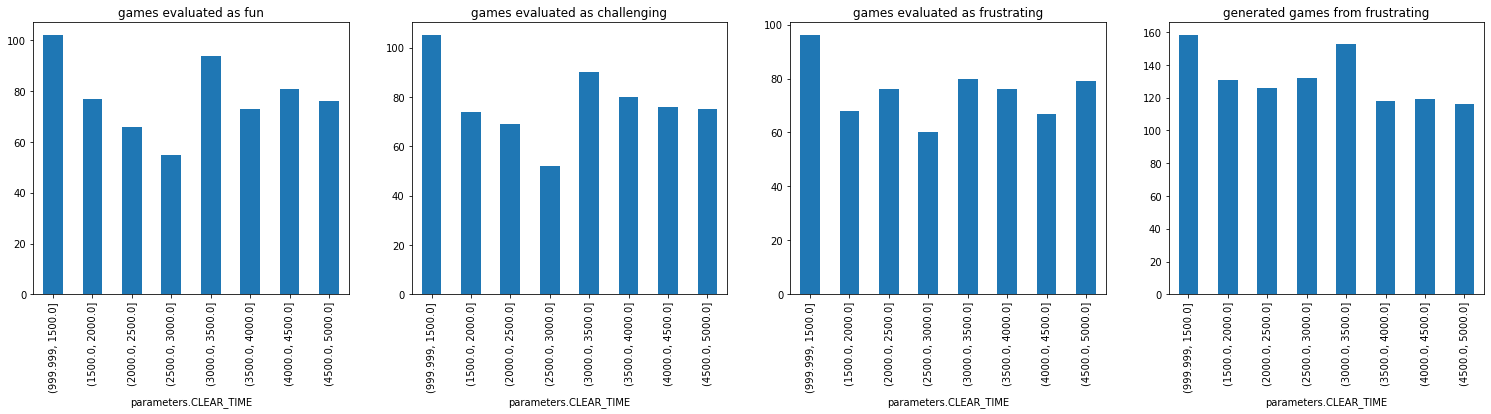

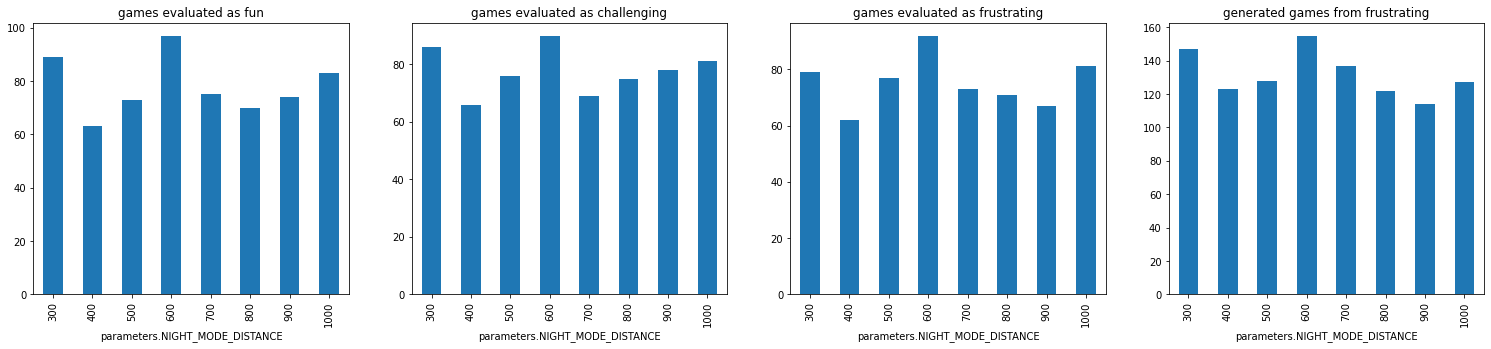

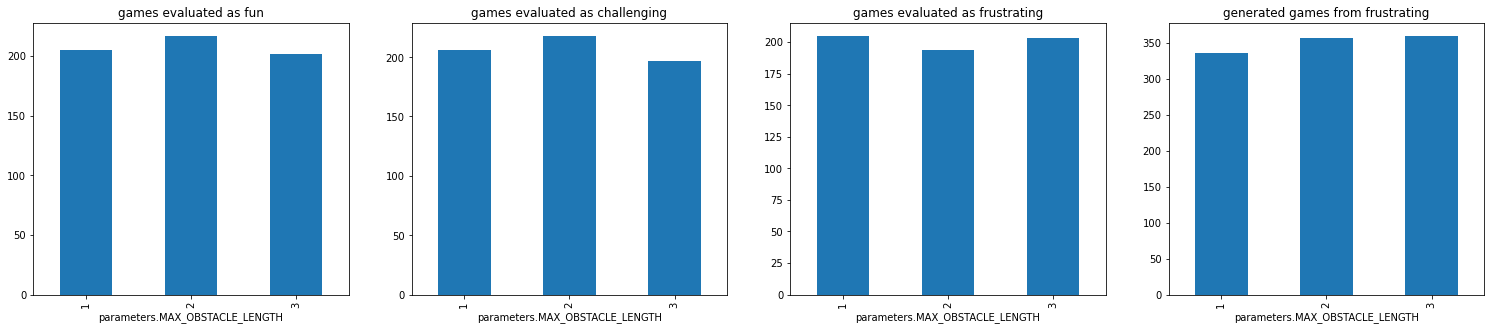

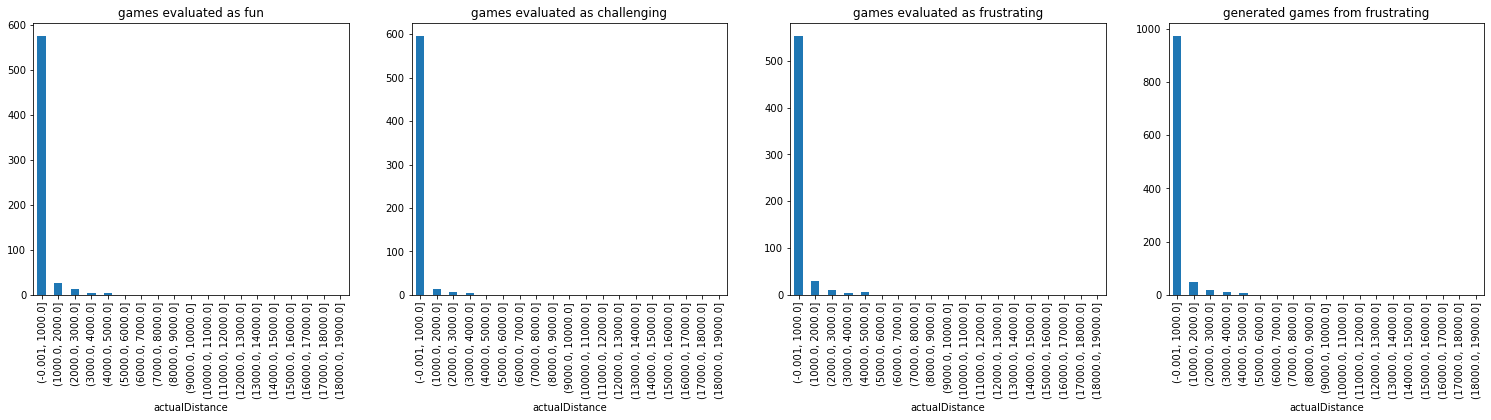

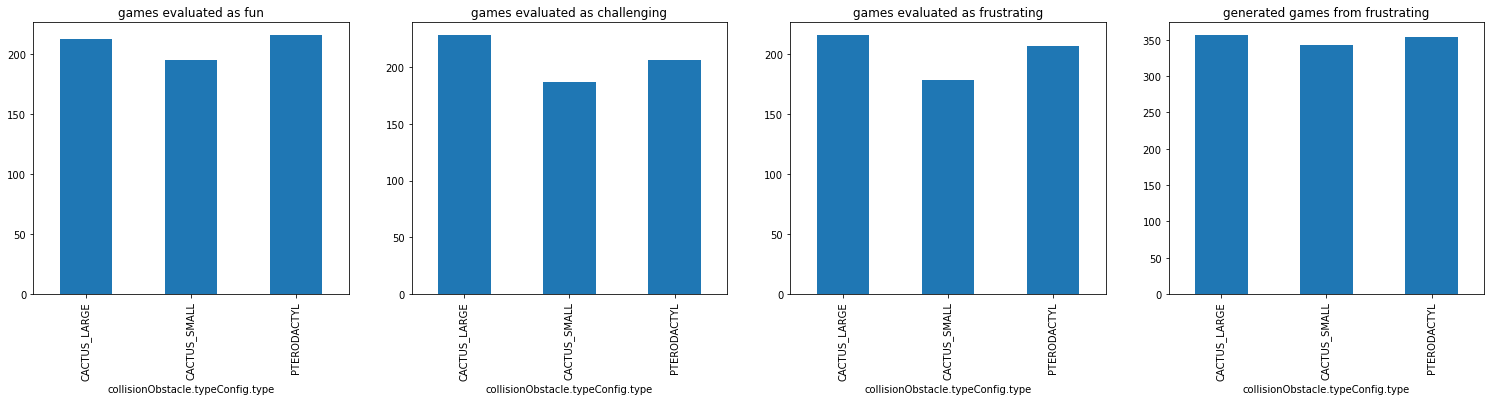

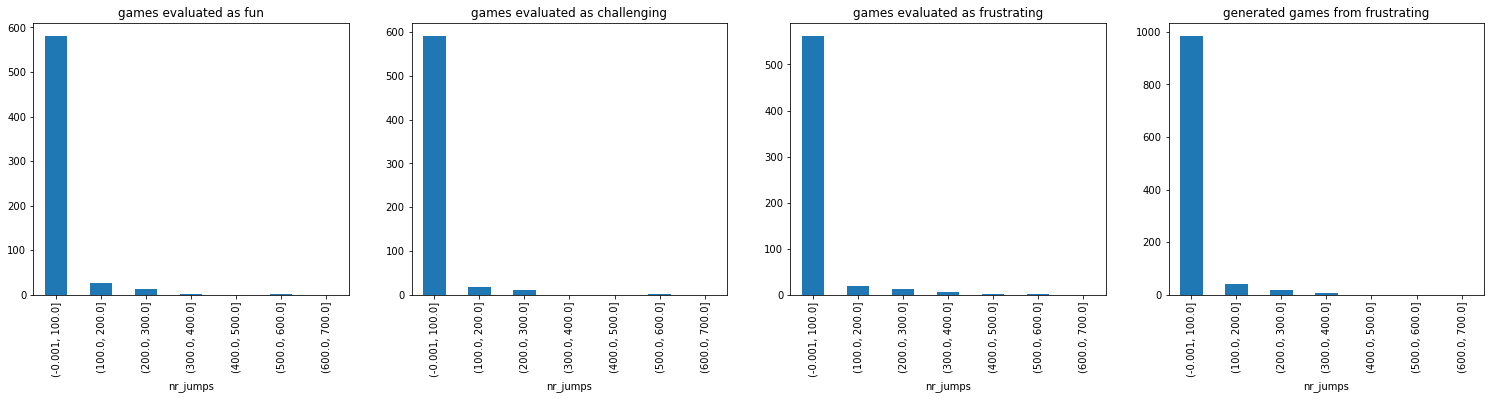

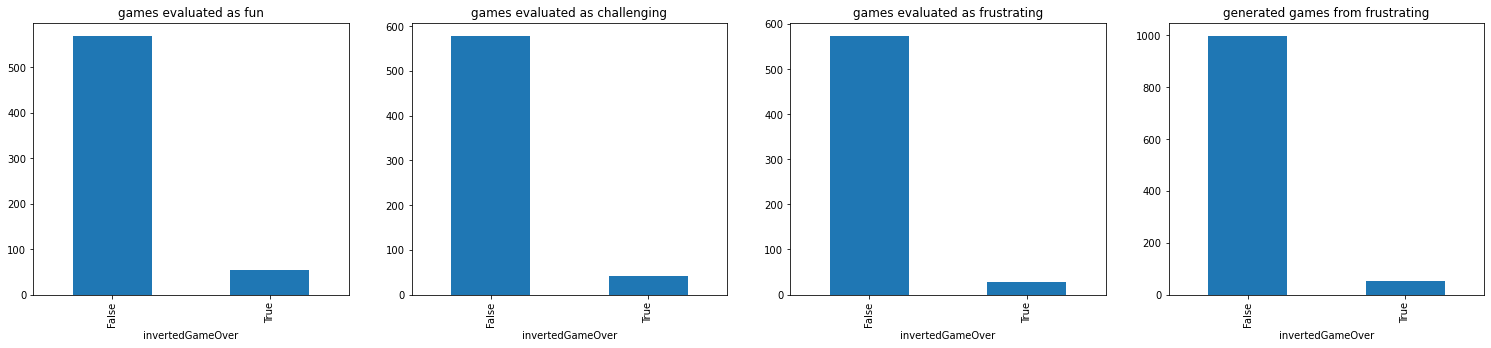

In [4]:
def explode_positive_counts_of(x): # questionresonses
    a = questionresponses
    a = a.explode(x)
    a['selected'] = np.where(a[x]=='secondlastentry', a['secondlastentry'], a['lastentry'])
    return a[[x, 'selected']]


def append_column_on_selected_id(db, parameter):
    a = db.merge(gameplays, left_on='selected', right_on='_id.$oid')
    return a[[parameter, "selected"]]
    
def group_positive_counts(column, group, bins = None):
    exploded = explode_positive_counts_of(column)
    s = append_column_on_selected_id(exploded, group)
    if(bins):
        c = pd.cut(s[group], bins = bins, include_lowest=True)
        counts = c.value_counts().reindex(c.cat.categories)
    else:
        counts = s[group].groupby(s[group]).count()
    return counts

def generated_group_counts(group, bins = None):
    if(bins):
        c = pd.cut(gameplays[group], bins, include_lowest=True)
        generated_counts = c.value_counts().reindex(c.cat.categories)
    else:
        generated_counts = gameplays[group].groupby(gameplays[group]).count()
    return generated_counts
        
columns = ["fun", "challenging", "frustrating"]
def draw_positive_counts(group, bins = None):
    plt.figure(figsize=(26, 5))
    for i, column in enumerate(columns):
        plt.subplot(1, 4, i+1)
        counts = group_positive_counts(column, group, bins)
        ax = counts.plot(kind="bar", title="games evaluated as " + column)
        ax.set_xlabel(group)
    plt.subplot(1, 4, 4)
    generated_counts = generated_group_counts(group, bins)
    ax = generated_counts.plot(kind="bar", title="generated games from " + column)
    ax.set_xlabel(group)

# ! only use this for discrete values !
if(True):
    draw_positive_counts("parameters.SPEED")
    plt.savefig('graphs/notebook/evaluations_not_normalized_speed.png')
    
    draw_positive_counts("parameters.MIN_GAP", list(range(250,401,25)))
    plt.savefig('graphs/notebook/evaluations_not_normalized_min_gap.png')
    
    draw_positive_counts("parameters.MAX_GAP", list(range(250,401,25)))
    plt.savefig('graphs/notebook/evaluations_not_normalized_max_gap.png')
    
    draw_positive_counts("parameters.NIGHT_MODE_ENABLED")
    plt.savefig('graphs/notebook/evaluations_not_normalized_night_mode_enabled.png')
    
    draw_positive_counts("parameters.CLEAR_TIME", list(range(1000, 5001, 500)))
    plt.savefig('graphs/notebook/evaluations_not_normalized_clear_time.png')
    
    draw_positive_counts("parameters.NIGHT_MODE_DISTANCE")
    plt.savefig('graphs/notebook/evaluations_not_normalized_night_mode_distance.png')
    
    draw_positive_counts("parameters.MAX_OBSTACLE_LENGTH")
    plt.savefig('graphs/notebook/evaluations_not_normalized_obstacle_length.png')
    
    draw_positive_counts("actualDistance", list(range(0,20000,1000)))
    plt.savefig('graphs/notebook/evaluations_not_normalized_actualDistance.png')
    
    draw_positive_counts("collisionObstacle.typeConfig.type")
    plt.savefig('graphs/notebook/evaluations_not_normalized_collisionObstacle.png')
    
    draw_positive_counts("nr_jumps", list(range(0,800,100)))
    plt.savefig('graphs/notebook/evaluations_not_normalized_nr_jumps.png')
    
    draw_positive_counts("invertedGameOver")
    plt.savefig('graphs/notebook/evaluations_not_normalized_invertedGameOver.png')

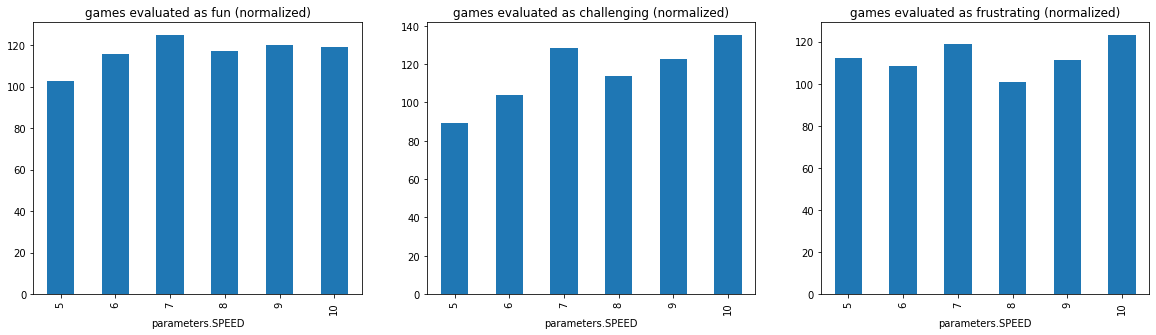

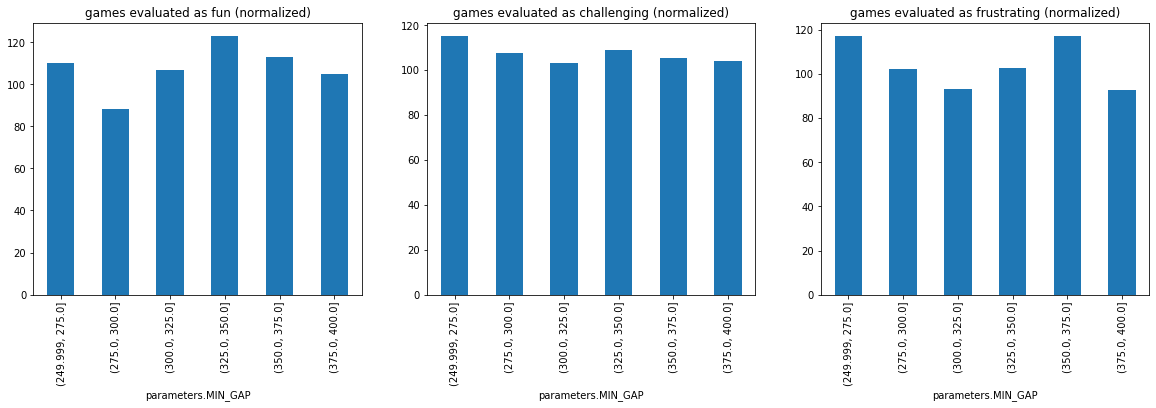

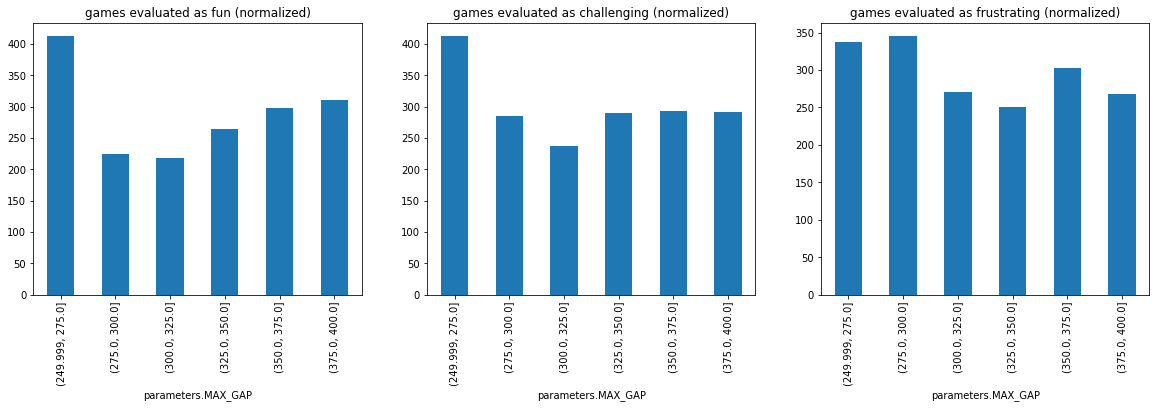

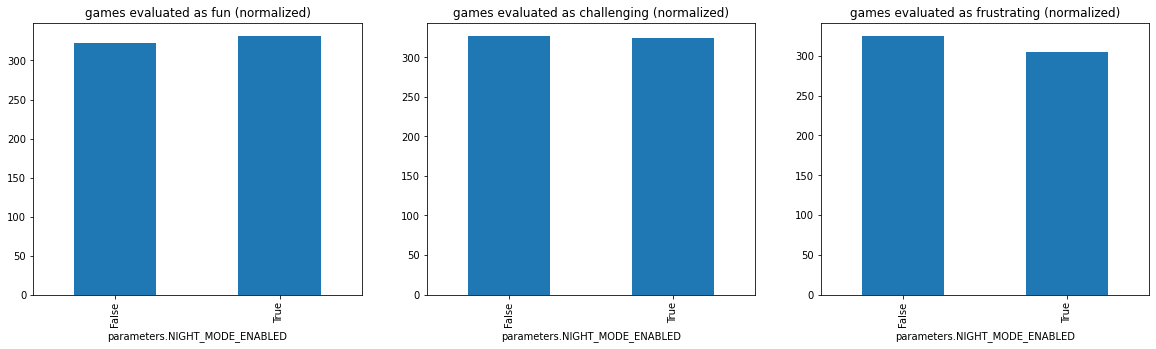

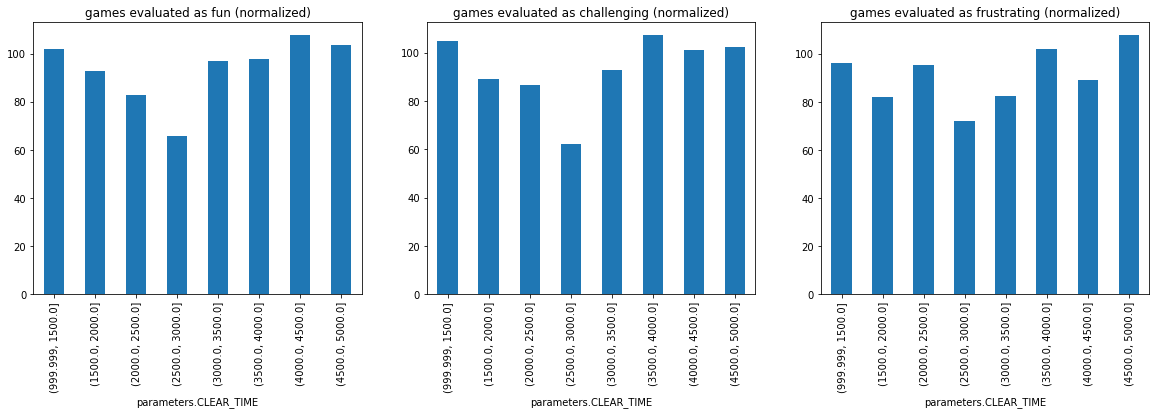

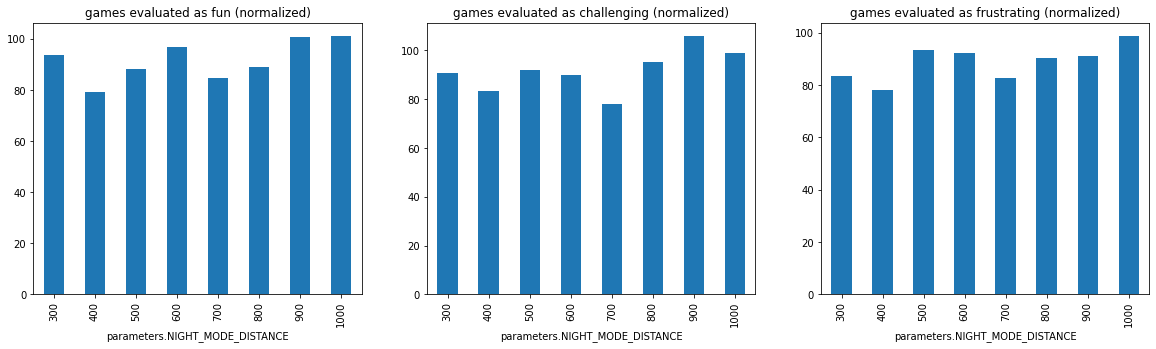

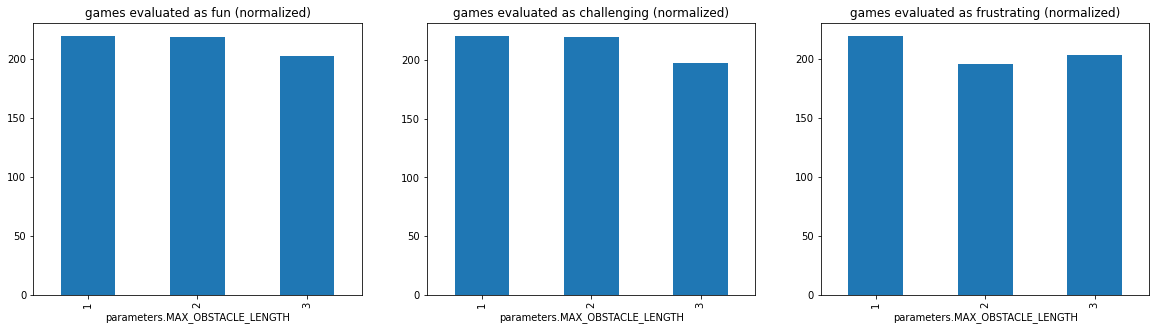

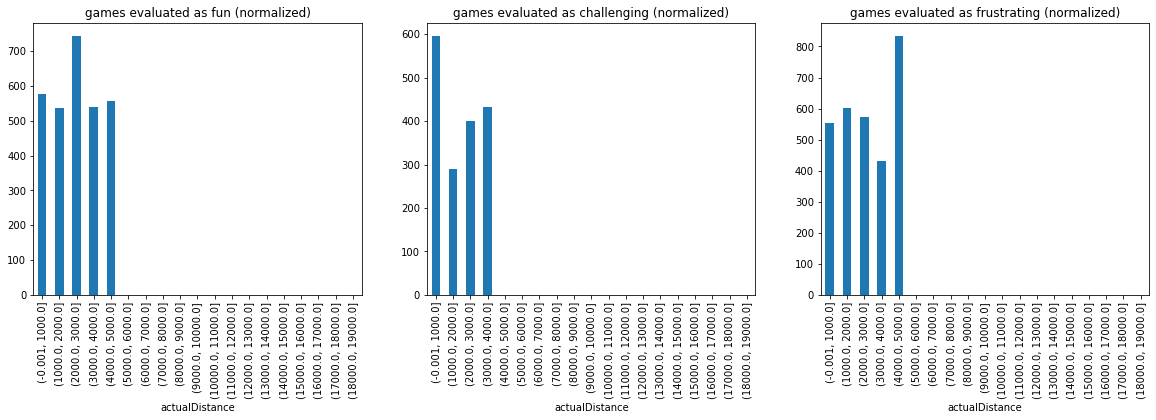

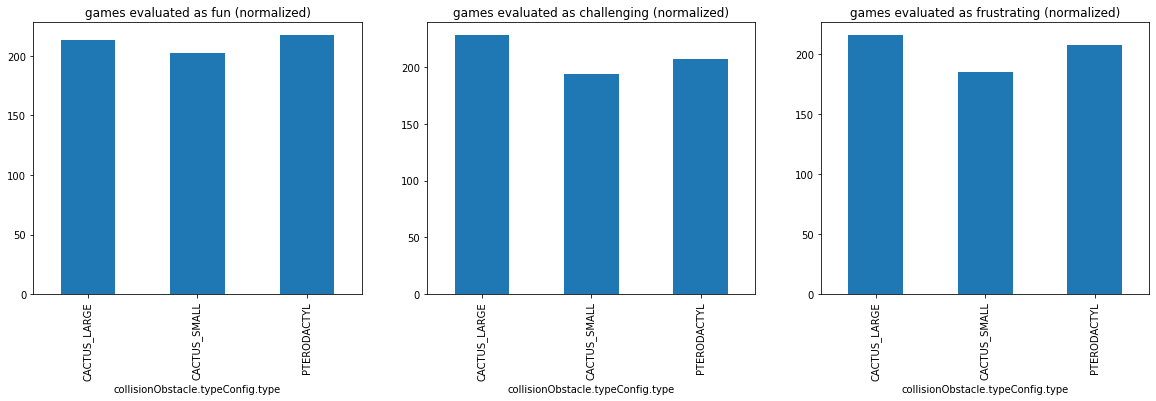

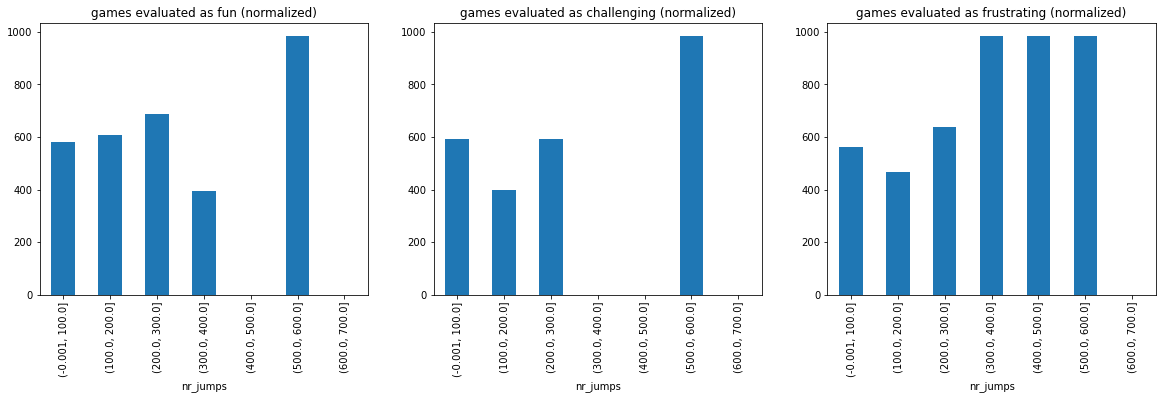

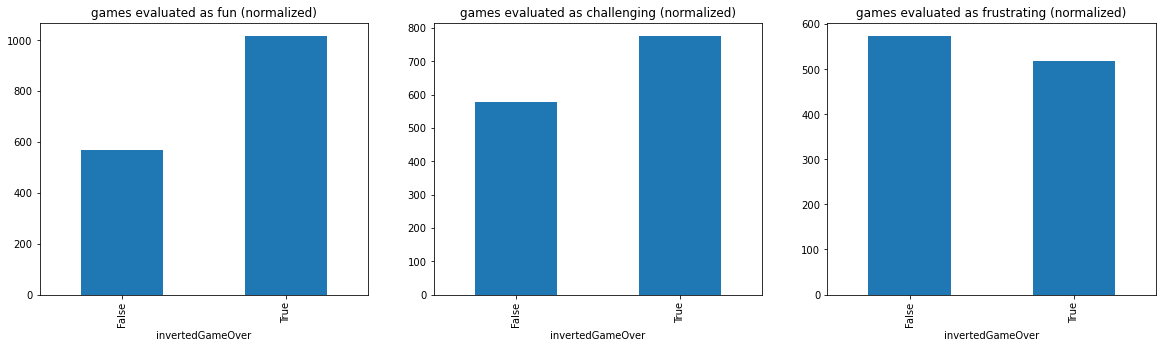

In [5]:
columns = ["fun", "challenging", "frustrating"]
def draw_positive_counts_normalized(group, bins = None):
    plt.figure(figsize=(20, 5))
    for i, column in enumerate(columns):
        plt.subplot(1, 3, i+1)
        counts = group_positive_counts(column, group, bins)
        generated = generated_group_counts(group, bins)
        generated_max = generated.max()
        factors = generated_max / generated
        counts_normalized = counts * factors
        ax1 = counts_normalized.plot(kind="bar", title="games evaluated as " + column + " (normalized)", xlabel=group)

draw_positive_counts_normalized("parameters.SPEED")
plt.savefig('graphs/notebook/evaluations_normalized_speed.png')

draw_positive_counts_normalized("parameters.MIN_GAP", list(range(250,401,25)))
plt.savefig('graphs/notebook/evaluations_normalized_min_gap.png')

draw_positive_counts_normalized("parameters.MAX_GAP", list(range(250,401,25)))
plt.savefig('graphs/notebook/evaluations_normalized_max_gap.png')

draw_positive_counts_normalized("parameters.NIGHT_MODE_ENABLED")
plt.savefig('graphs/notebook/evaluations_normalized_night_mode_enabled.png')

draw_positive_counts_normalized("parameters.CLEAR_TIME", list(range(1000, 5001, 500)))
plt.savefig('graphs/notebook/evaluations_normalized_clear_time.png')

draw_positive_counts_normalized("parameters.NIGHT_MODE_DISTANCE")
plt.savefig('graphs/notebook/evaluations_normalized_night_mode_distance.png')

draw_positive_counts_normalized("parameters.MAX_OBSTACLE_LENGTH")
plt.savefig('graphs/notebook/evaluations_normalized_obstacle_length.png')

draw_positive_counts_normalized("actualDistance", list(range(0,20000,1000)))
plt.savefig('graphs/notebook/evaluations_normalized_actualDistance.png')

draw_positive_counts_normalized("collisionObstacle.typeConfig.type")
plt.savefig('graphs/notebook/evaluations_normalized_collisionObstacle.png')

draw_positive_counts_normalized("nr_jumps", list(range(0,800,100)))
plt.savefig('graphs/notebook/evaluations_normalized_nr_jumps.png')

draw_positive_counts_normalized("invertedGameOver")
plt.savefig('graphs/notebook/evaluations_normalized_invertedGameOver.png')